# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [161]:
data = pd.read_json('channel_messages.json')
data = data[['date', 'message']]
data['date'] = data['date'].dt.date

<AxesSubplot: xlabel='date'>

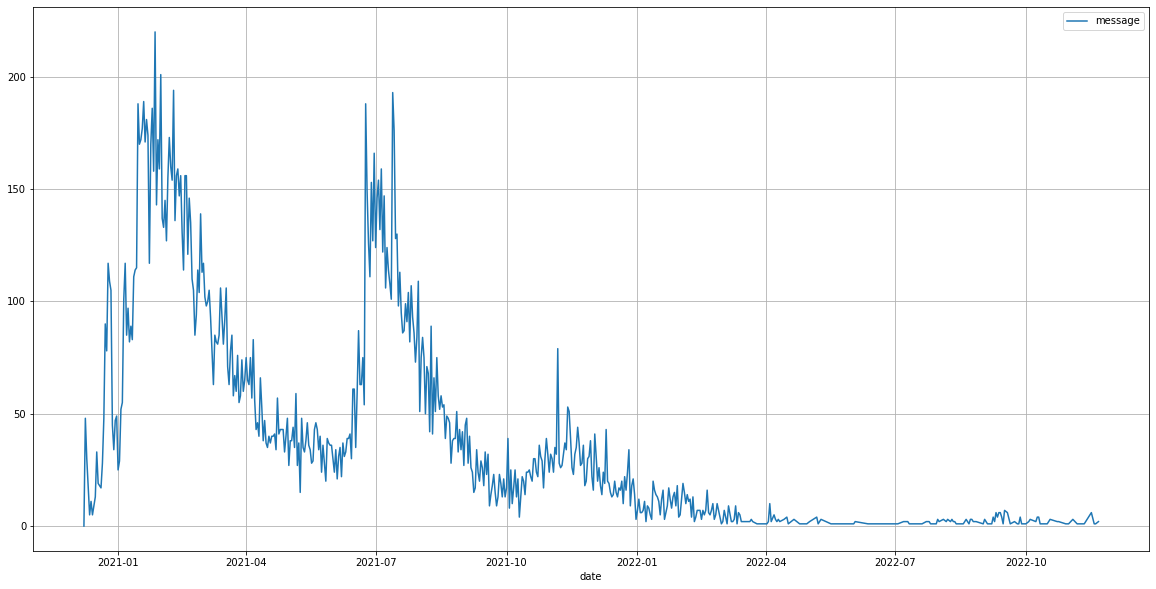

In [162]:
data.groupby('date').count().plot(figsize=(20,10), grid=True)

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

In [163]:
data[['sex', 'age']] = data.message.str.extract(r'(мужчина|женщина|[мж])[^a-zа-я0-9]*(\d+)', flags=re.IGNORECASE)

In [166]:
data = data[~data['sex'].isna() & ~data['age'].isna()]

In [167]:
data

,date,message,sex,age
2,2022-11-19,"#ревак \n#назально #спутник\nЖ46, сентябрь, ок...",Ж,46
5,2022-11-16,"М. 30.Болел 1 раз, июнь 2020, и ноябрь 2020. П...",М,30
9,2022-11-16,#ревак #назально #спутник\nЖ35\nПервая вакцина...,Ж,35
10,2022-11-11,"#ревак #назально #спутник \nМ 48, Москва, до...",М,48
11,2022-11-10,"#ревак \n#назально #спутник\nЖ23, ранее в 01.2...",Ж,23
...,...,...,...,...
31560,2020-12-09,М37. Первый компонент 03.12.2020 в 17:00. Чере...,М,37
31578,2020-12-09,Расскажу первые ощущение на свежую голову про ...,м,38
31592,2020-12-09,Какие тесты сдавать для определения иммуногенн...,М,885
31600,2020-12-09,"У меня а первые сутки температура были 37,5, п...",м,37


In [169]:
data['age'] = data['age'].astype(int)
data = data[data['age']<100]

/tmp/ipykernel_21221/262982106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = data['age'].astype(int)


In [170]:
data['sex'] = data['sex'].str.lower().map({'м': 'M', 'мужчина': 'M', 'ж': 'F', 'женщина': 'F'})

/tmp/ipykernel_21221/680039408.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = data['sex'].str.lower().map({'м': 'M', 'мужчина': 'M', 'ж': 'F', 'женщина': 'F'})


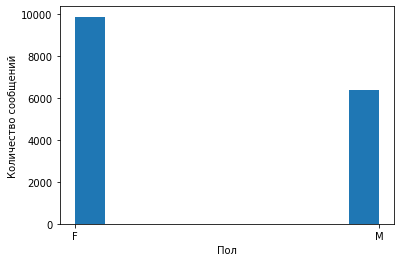

In [172]:
plt.hist(data[~data['sex'].isna()]['sex'])
plt.xlabel('Пол')
plt.ylabel('Количество сообщений')
plt.show()

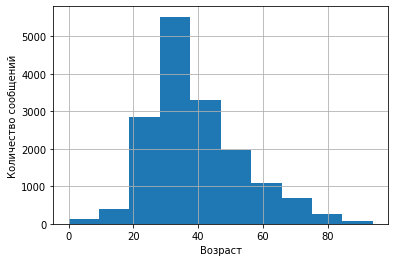

In [183]:
data[~data['age'].isna()]['age'].hist()
plt.xlabel('Возраст')
plt.ylabel('Количество сообщений')
plt.show()

In [184]:
data['BAU'] = data.message.str.extract(r'(\d+)[.,]\d+? BAU', flags=re.IGNORECASE)

/tmp/ipykernel_21221/2668685671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BAU'] = data.message.str.extract(r'(\d+)[.,]\d+? BAU', flags=re.IGNORECASE)


In [210]:
import seaborn as sns

In [223]:
data_bau = data[~data['BAU'].isna()]

In [224]:
data_bau['BAU'] = data_bau['BAU'].astype(int)

/tmp/ipykernel_21221/510628426.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_bau['BAU'] = data_bau['BAU'].astype(int)


In [231]:
bau_by_age = data_bau.groupby('age').mean()['BAU']

Text(0.5, 0, 'Возраст')

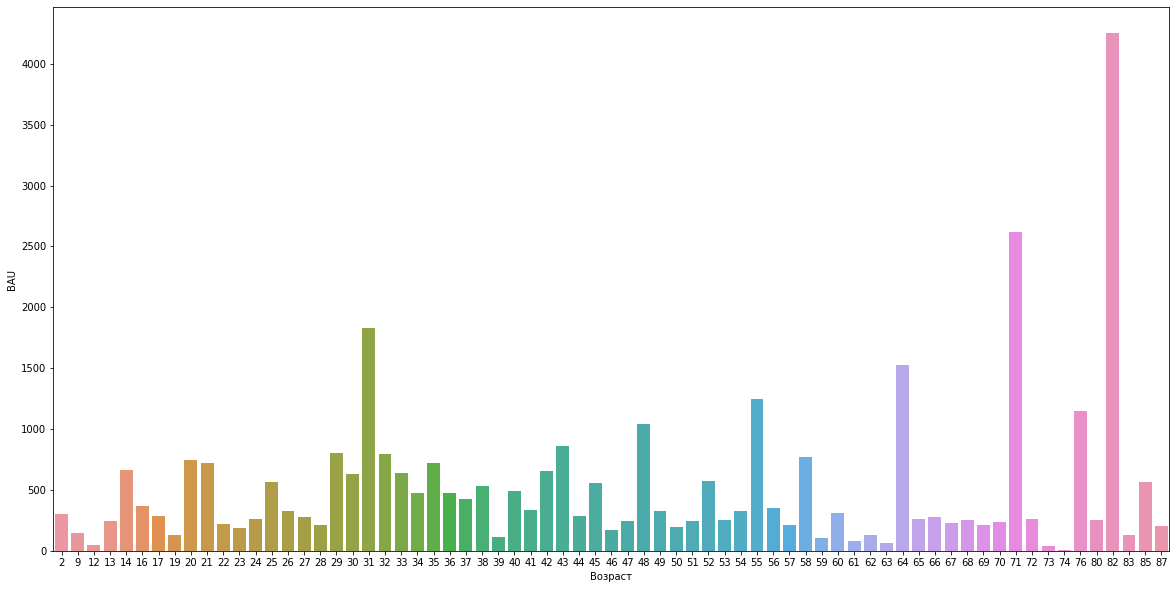

In [236]:
plt.figure(figsize=(20,10))
sns.barplot(x=bau_by_age.index, y=bau_by_age.values)
plt.ylabel('BAU')
plt.xlabel('Возраст')